In [1]:
import pandas as pd
import numpy as np

# 그래프(시각화) 라이브러리
import matplotlib.pyplot as plt          # 그래프 기능 담당(제목, x축, y축 조절, 색상 변경)
import seaborn as sns                    # 세련된 그래프 그리기

import matplotlib as mpl
# 한글 폰트 설정 (Windows: Malgun Gothic / Mac: AppleGothic / Linux: 나눔폰트 등)
mpl.rcParams['font.family'] = 'Malgun Gothic'  # Windows / 폰트가 깨지지 않게 해줌

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

# e : 10의 제곱
print(1e-1)      # 1 x 0.1
print(3.14e-3)   # 3.14 x 0.001
print(3.14e+4)   # 3.14 x 10000

0.1
0.00314
31400.0


In [2]:
# data 폴더 안에 있는 CSV 파일 불러오기
df = pd.read_csv('data/닥터마틴_best_df.csv', encoding='utf-8-sig')

In [3]:
# 데이터 확인
print(df.shape)
df.head()

(61, 7)


,gender,product,color,price,review_cnt,rating,review
0,남자,1461 스무스,BLK,229000,266,4.9,"남자친구 선물이었는데, 너무 좋아하네요!길들이는데 좀 걸리지만 디자인은 최고입니다...."
1,남자,1461 크레이지호스,DRB,229000,69,4.6,정말 오래 기다렸습니다... 오프라인 매장도 다가보고 헛걸음했는데 갑자기 온라인으로...
2,남자,1461 쿼드,BLK,269000,42,4.8,딸아이 신고싶다고 해서 사준건데 사이즈때문에 교환은 했지만 너무 좋아해요. 나갈때마...
3,남자,1461 모노,BLK,229000,417,4.8,닥터마틴 길들이는데 힘들다고해소 걱정하고 사서 신었는데 소문과는 다르게 편하게 잘 ...
4,남자,1461 나파 (무광),BLK,229000,116,4.8,물건 좋네요 수고하세요 착화감이 좋네요 이쁘고 좋아요타사 제품 사용하다가 유투브로...


In [4]:
df.describe()

,price,review_cnt,rating
count,61.000000,61.000000,61.000000
mean,238459.016393,60.377049,4.049180
std,46783.392271,89.444986,1.776666
min,154000.000000,0.000000,0.000000
25%,229000.000000,4.000000,4.600000
50%,229000.000000,31.000000,4.800000
75%,279000.000000,73.000000,4.900000
max,349000.000000,417.000000,5.000000


In [5]:
df.describe(include='object')

,gender,product,color,review
count,61,61,61,61
unique,2,29,7,30
top,여자,로웰,BLK,리뷰없음
freq,34,6,45,9


In [6]:
# 전체 데이터프레임을 리뷰 수 기준 내림차순 정렬
# 남성과 여성의 리뷰수가 동일한 문제점이 있음
popular_products = df.sort_values('review_cnt', ascending=False)
popular_products

,gender,product,color,price,review_cnt,rating,review
30,여자,1461 모노,BLK,229000,417,4.8,닥터마틴 길들이는데 힘들다고해소 걱정하고 사서 신었는데 소문과는 다르게 편하게 잘 ...
3,남자,1461 모노,BLK,229000,417,4.8,닥터마틴 길들이는데 힘들다고해소 걱정하고 사서 신었는데 소문과는 다르게 편하게 잘 ...
27,여자,1461 스무스,BLK,229000,266,4.9,"남자친구 선물이었는데, 너무 좋아하네요!길들이는데 좀 걸리지만 디자인은 최고입니다...."
0,남자,1461 스무스,BLK,229000,266,4.9,"남자친구 선물이었는데, 너무 좋아하네요!길들이는데 좀 걸리지만 디자인은 최고입니다...."
49,여자,제이든,BLK,309000,179,4.8,도움돼요도움돼요도움돼요신고 및 차단신고 및 차단
...,...,...,...,...,...,...,...
56,여자,폴리,BLK,168000,0,0.0,리뷰없음
24,남자,브루클라인 로우,BLK,169000,0,0.0,리뷰없음
25,남자,산 뮬,BLK,180000,0,0.0,리뷰없음
19,남자,로웰,KHA,200000,0,0.0,리뷰없음


In [7]:
# 남자 제품과 여자 제품 집합 만들기
male_products = set(df[df['gender']=='남자']['product'])
female_products = set(df[df['gender']=='여자']['product'])

# 여성만 있는 제품
female_only = female_products - male_products
print(female_only)

{'1B60', '8065 메리제인', '1B60 벡스', '1b99', '폴리', '메이볼 메리제인', '아마야 하이'}


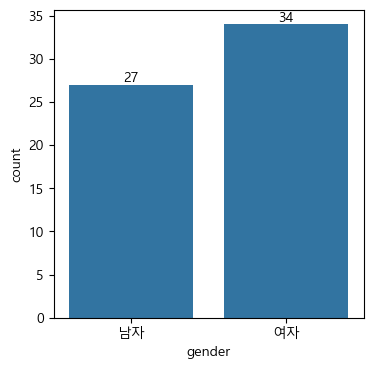

In [8]:
# 여성 제품이 7개 많고 나머지는 다 동일제품
plt.figure(figsize=(4,4))
graph = sns.countplot(df, x='gender');
graph.bar_label(graph.containers[0]);

In [12]:
df.head()

,product,color,price,review_cnt,rating,review
27,1461 스무스,BLK,229000,266,4.9,"남자친구 선물이었는데, 너무 좋아하네요!길들이는데 좀 걸리지만 디자인은 최고입니다...."
28,1461 크레이지호스,DRB,229000,69,4.6,정말 오래 기다렸습니다... 오프라인 매장도 다가보고 헛걸음했는데 갑자기 온라인으로...
29,1461 쿼드,BLK,269000,42,4.8,딸아이 신고싶다고 해서 사준건데 사이즈때문에 교환은 했지만 너무 좋아해요. 나갈때마...
30,1461 모노,BLK,229000,417,4.8,닥터마틴 길들이는데 힘들다고해소 걱정하고 사서 신었는데 소문과는 다르게 편하게 잘 ...
31,1461 나파 (무광),BLK,229000,116,4.8,물건 좋네요 수고하세요 착화감이 좋네요 이쁘고 좋아요타사 제품 사용하다가 유투브로...


In [11]:
# 여성 데이터만 선택하고 젠더 컬럼을 삭제
df_filtered = df.iloc[27:]
df = df_filtered.drop(columns='gender')

KeyError: "['gender'] not found in axis"

# 1. 리뷰수가 많은 인기 상품 파악

In [58]:
# 1. 리뷰수가 많은 인기 상품 파악
df[['product', 'color', 'review_cnt']].sort_values('review_cnt', ascending=False)

,product,color,review_cnt
30,1461 모노,BLK,417
27,1461 스무스,BLK,266
49,제이든,BLK,179
31,1461 나파 (무광),BLK,116
42,제이든 III,BLK,114
32,1461 벡스,BLK,113
47,1B60,BLK,103
39,1460 스무스,BLK,77
36,2976 모노,BLK,73
28,1461 크레이지호스,DRB,69


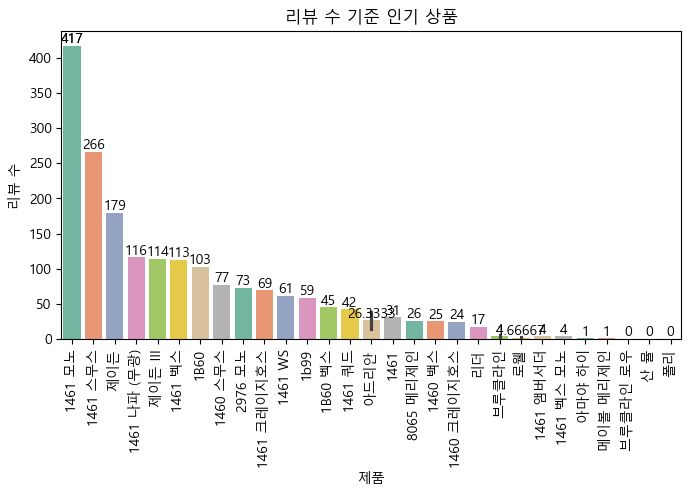

In [61]:
# 리뷰수가 많은 인기 상품 시각화
plt.figure(figsize=(8,4))
graph = sns.barplot(popular_products, x='product', y='review_cnt', palette='Set2')

graph.bar_label(graph.containers[0])
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation=90)
plt.title("리뷰 수 기준 인기 상품")
plt.xlabel("제품")
plt.ylabel("리뷰 수");

# 2. 인기있는 색상 파악

In [35]:
# 전체 상품 색상 수
df['color'].value_counts()

color
BLK      26
DRB       2
CRED      2
KHA       1
SVR       1
BRW       1
WHE       1
Name: count, dtype: int64

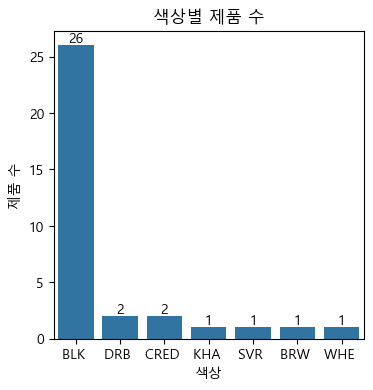

In [65]:
# 제품 별 색상 시각화
plt.figure(figsize=(4,4))
graph = sns.countplot(df, x='color')
graph.bar_label(graph.containers[0])
plt.title("색상별 제품 수")
plt.xlabel("색상")
plt.ylabel("제품 수");

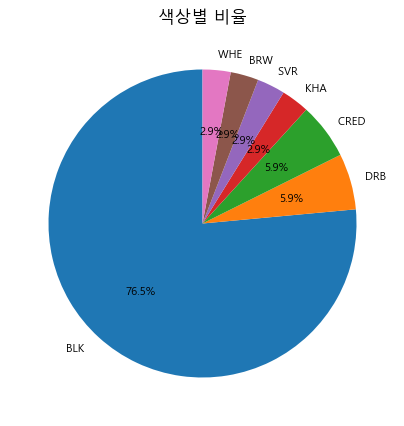

In [73]:
# 색상 비율 파이 차트
plt.figure(figsize=(5,5))
plt.title("색상별 비율");
color = df['color'].value_counts()
plt.pie(color.values, labels=color.index,
        autopct='%1.1f%%',      
        startangle=90,
        textprops={'fontsize': 8});  # 글씨 크기 조절

In [78]:
# 소비자의 색상 선호도 파악
cus_color = (df.groupby('color')['review_cnt'].sum().sort_values(ascending=False))
print(df['review_cnt'].sum())
cus_color

1959


color
BLK      1794
DRB        93
CRED       66
SVR         4
WHE         2
BRW         0
KHA         0
Name: review_cnt, dtype: int64

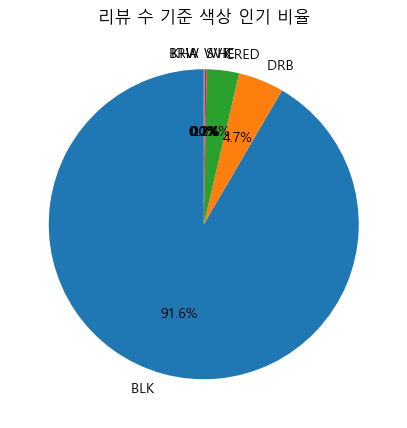

In [92]:
plt.figure(figsize=(5,6))
plt.title("리뷰 수 기준 색상 인기 비율")
plt.pie(cus_color.values,labels=cus_color.index,autopct='%1.1f%%',startangle=90);

In [38]:
# 2) 동일 상품 내 색상 별 선호
# 중복된 제품명만 확인
duplicate_df = df[df['product'].duplicated(keep=False)]
duplicate_df

,product,color,price,review_cnt,rating,review
37,브루클라인,BLK,169000,6,4.8,출근룩에 딱 어울리네요품질 좋아요.소재가 너무 좋아요. 브루클라인 화이트랑 같이 샀...
40,아드리안,CRED,239000,35,4.9,i like shoes colour totally satistified235신으나 ...
41,아드리안,BLK,239000,40,4.9,도움돼요이주동안 질질 끌고 다니었고예쁘게 잘 신을게요^^도움돼요도움돼요
44,로웰,BLK,259000,5,4.8,또다른 매력 맘에 들어요평소 275신는데 280사이즈 잘 맞습니다구매 후기를 봤을때...
48,로웰,KHA,200000,0,0.0,리뷰없음
50,아드리안,SVR,154000,4,4.0,공홈 재고관리 전혀 안됨로퍼라 그런지 확실히 딱맞게 신는 게 좋은 것 같아요 디자인...
51,로웰,BRW,259000,0,0.0,리뷰없음
52,브루클라인,WHE,169000,2,5.0,"브루클라인 블랙도 같이 샀어요. 진짜 실물이 훨씬 이뻐요. 편안하고 튼튼해보이고, ..."


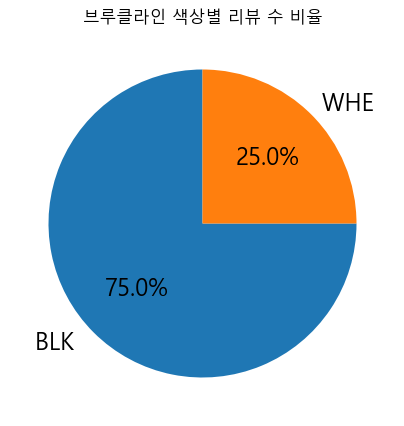

In [107]:
df_brookline = duplicate_df[duplicate_df['product'] == '브루클라인']

plt.figure(figsize=(5,5))
plt.title("브루클라인 색상별 리뷰 수 비율")
plt.pie(df_brookline['review_cnt'],labels=df_brookline['color'],
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 17});

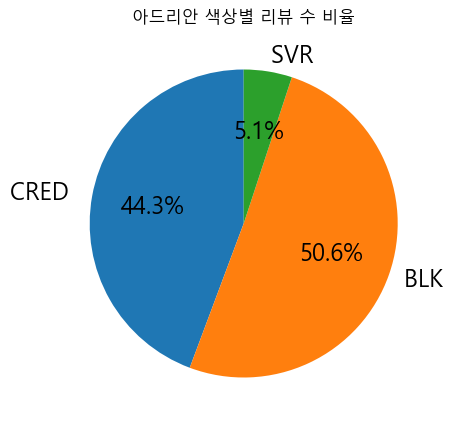

In [105]:
df_adrline = duplicate_df[duplicate_df['product'] == '아드리안']

plt.figure(figsize=(5,5))
plt.pie(df_adrline['review_cnt'],
        labels=df_adrline['color'],
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 17})
plt.title("아드리안 색상별 리뷰 수 비율");

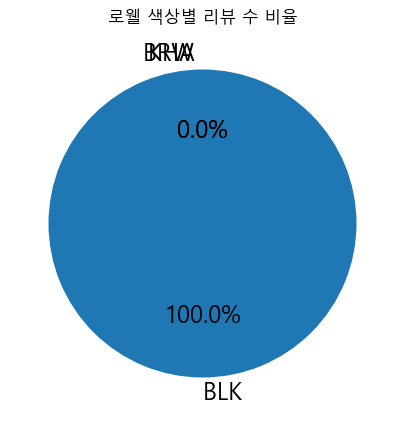

In [104]:
df_lowell = duplicate_df[duplicate_df['product'] == '로웰']

plt.figure(figsize=(5,5))
plt.pie(df_lowell['review_cnt'],
        labels=df_lowell['color'],
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 17})
plt.title("로웰 색상별 리뷰 수 비율");

# 가격이 제일 높은 상품과 낮은 상품

In [42]:
df['price'].max()

349000

In [112]:
df['price'].mean().round()

np.float64(241912.0)

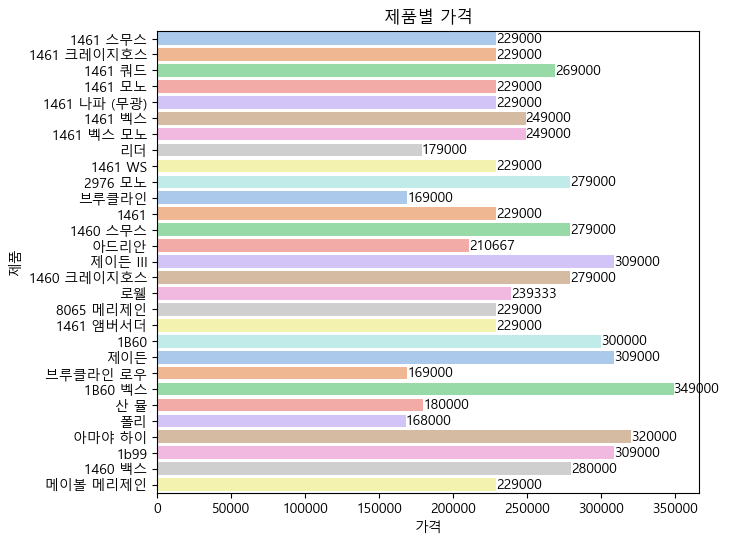

In [123]:
plt.figure(figsize=(7,6))
plt.title("제품별 가격")
graph = sns.barplot(df, y='product', x='price', palette='pastel', ci=None);
for container in graph.containers:
    graph.bar_label(container)

plt.xlabel("가격");
plt.ylabel("제품");

# 상관관계

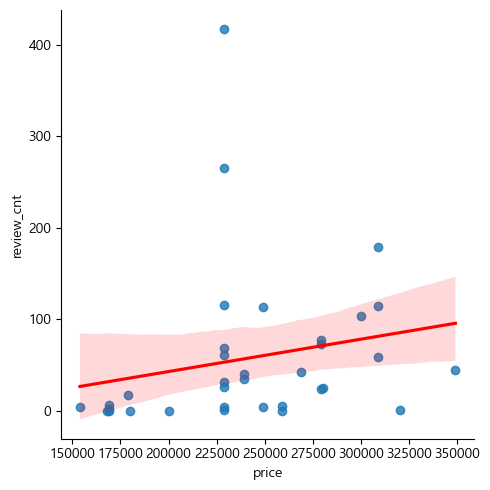

In [124]:
#산점도 분석 - 가격과 리뷰수
sns.lmplot(df,x='price',y='review_cnt', line_kws={'color':'red'});

In [45]:
df[['price','review_cnt']].corr()

,price,review_cnt
price,1.000000,0.203873
review_cnt,0.203873,1.000000


In [46]:
#상관관계가 0.2로 거의 없다고 볼 수 있음
df[['price','review_cnt']].corr().iloc[0,1].round(3)

np.float64(0.204)

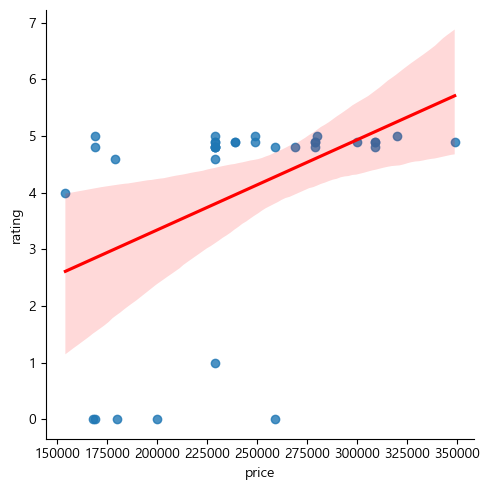

In [47]:
#가격과 평점 간 상관관계
sns.lmplot(df,x='price',y='rating',line_kws={'color':'red'});

In [48]:
# 0.4로 어느정도 있음 - 가격이 높을수록 평점이 높음
df[['price','rating']].corr()

,price,rating
price,1.000000,0.434351
rating,0.434351,1.000000


In [49]:
df[['price','rating']].corr().iloc[0,1].round(3)

np.float64(0.434)

# 이상치 데이터 추출

In [50]:
# 이상치 구하기
Q1 = df['review_cnt'].quantile(0.25)
Q2 = df['review_cnt'].quantile(0.5)
Q3 = df['review_cnt'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q2,Q3,IQR)

4.0 28.5 72.0 68.0


In [51]:
#최소값, 최대값
review_cnt_min = df['review_cnt'].min()
review_cnt_max = df['review_cnt'].max()

print(review_cnt_min,review_cnt_max)

0 417


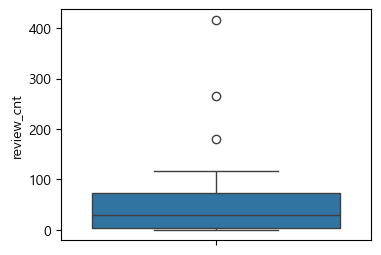

In [52]:
# 리뷰수 상자그림 그리기
plt.figure(figsize=(4,3))
sns.boxplot(df,y='review_cnt');

In [53]:
# 상위 이상치 경계
# 공식 = Q3 + 1.5*IQR
upper_bound = Q3 + 1.5*IQR
upper_bound

np.float64(174.0)

In [54]:
# 중간 결론: 사분위 통계적 이상치 검출을 해보니, 상위 이상치 경계값인 174 초과는 이상치 데이터로 보임
# 이 상품들은 어떤 이유인지 극단적으로 높은 리뷰수를 가짐. 왜 그랬는지 확인이 필요해 보임

In [55]:
# 이상치 데이터 파악 완료
df[df['review_cnt'] > upper_bound]

,product,color,price,review_cnt,rating,review
27,1461 스무스,BLK,229000,266,4.9,"남자친구 선물이었는데, 너무 좋아하네요!길들이는데 좀 걸리지만 디자인은 최고입니다...."
30,1461 모노,BLK,229000,417,4.8,닥터마틴 길들이는데 힘들다고해소 걱정하고 사서 신었는데 소문과는 다르게 편하게 잘 ...
49,제이든,BLK,309000,179,4.8,도움돼요도움돼요도움돼요신고 및 차단신고 및 차단


In [56]:
# 판다스 출력 옵션 변경
import pandas as pd

# 최대 행 출력 (None = 제한 없음)
pd.set_option('display.max_rows', None)

# 최대 열 출력 (None = 제한 없음)
pd.set_option('display.max_columns', None)